In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = []
label = []
f = open('data0.txt', 'r')
for line in f:
    line = line.strip('\n')
    line = line.split(' ')
    data.append(line[:2])
    label.append(line[-1])
data = np.array(data).astype('int')
label = np.array(label).astype('int')

In [3]:
def predict(w, b, x):
    pred = np.dot(x,w) + b
    return np.argmax(pred,axis=1)

In [4]:
w = np.zeros((2,4))
b = np.zeros((1,4))
pred = predict(w, b, data)
right = np.sum(pred==label)

In [6]:
while right != data.shape[0]:
    for i in range(data.shape[0]):
        if pred[i] != label[i]:
            w[:,label[i]] += data[i]
            b[:,label[i]] += 1
            w[:,pred[i]] -= data[i]
            b[:,pred[i]] -= 1
    pred = predict(w, b, data)
    right = np.sum(pred==label)

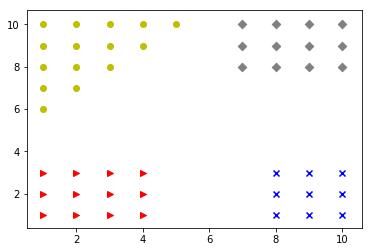

In [31]:
plt.figure()
for i in range(data.shape[0]):
    if label[i] == 0:
        plt.scatter(data[i][0], data[i][1], color='r', marker='>')
    elif label[i] == 1:
        plt.scatter(data[i][0], data[i][1], color='y', marker='o')
    elif label[i] == 2:
        plt.scatter(data[i][0], data[i][1], color='b', marker='x')
    else:
        plt.scatter(data[i][0], data[i][1], color='gray', marker='D')
plt.show()